---


# Optimisation des prix de vente afin d’augumenter la marge de gain


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
from statsmodels.formula.api import ols
import plotly.express as px
import plotly.graph_objects as go


## Importation des données


In [ ]:
data2020_T1 = pd.read_csv('Données\ELDPH_CAY_T12020.csv',
                          engine='python', sep=';', encoding='latin-1')
data2020_T1.head()


,Base_Magasin,R1 _ code_EAN,R2 _ libelle,Semaine2,Jour,Date_Key,CA,Quantites_Vendues,Marge,TYPE_PRIX,...,CoeffB_1,CoeffB_2,CoeffB_3,CoeffB_4,CoeffB_5,CoeffB_6,Nbr_Rupture,Flag_Rupture,CLASSEUR,CODE_PRODUIT
0,CAY,3065,PANACHE U 25CL,2,mar.,07/01/2020,"15,96",60,"4,2",P,...,-,-,-,-,-,-,-,-,SUPPRIME TEMPO CENTRALE,163533
1,CAY,3065,PANACHE U 25CL,7,ven.,14/02/2020,"0,56",2,"0,14",P,...,-,-,-,-,-,-,-,-,SUPPRIME TEMPO CENTRALE,163533
2,CAY,3065,PANACHE U 25CL,7,sam.,15/02/2020,"11,2",40,"2,8",P,...,-,-,-,-,-,-,-,-,SUPPRIME TEMPO CENTRALE,163533
3,CAY,3065,PANACHE U 25CL,7,dim.,16/02/2020,"1,68",6,"0,42",P,...,-,-,-,-,-,-,-,-,SUPPRIME TEMPO CENTRALE,163533
4,CAY,48220,PACK COCA COLA X24,1,jeu.,02/01/2020,"18,69",1,"3,74",N,...,-,-,-,-,-,-,-,-,NaN,371973


In [ ]:
df = data2020_T1.copy()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569734 entries, 0 to 569733
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Base_Magasin       569734 non-null  object
 1   R1 _ code_EAN      569734 non-null  object
 2   R2 _ libelle       569734 non-null  object
 3   Semaine2           569734 non-null  int64 
 4   Jour               569734 non-null  object
 5   Date_Key           569734 non-null  object
 6   CA                 569734 non-null  object
 7   Quantites_Vendues  569734 non-null  object
 8   Marge              569734 non-null  object
 9   TYPE_PRIX          569734 non-null  object
 10  PRIX_REV           569734 non-null  object
 11  PVC                569734 non-null  object
 12  NUMFAM             569734 non-null  int64 
 13  Famille            569734 non-null  object
 14  Secteur            569734 non-null  object
 15  Rayon              569734 non-null  object
 16  COD_MARKETING      5

In [ ]:
df.describe(include=['O'])


,Base_Magasin,R1 _ code_EAN,R2 _ libelle,Jour,Date_Key,CA,Quantites_Vendues,Marge,TYPE_PRIX,PRIX_REV,...,Gencode_B_6,CoeffB_1,CoeffB_2,CoeffB_3,CoeffB_4,CoeffB_5,CoeffB_6,Nbr_Rupture,Flag_Rupture,CLASSEUR
count,569734,569734,569734,569734,569734,569734,569734,569734,569734,569734,...,569734,569734,569734,569734,569734,569734,569734,569734,569734,543851
unique,1,1517,16289,7,89,11222,644,6865,3,2399,...,2,28,19,11,4,2,2,2,3,209
top,CAY,"3,25622E+12",COLGATE TRIIPLE ACTION ORI,sam.,01/02/2020,0,1,0,N,"2,3",...,-,-,-,-,-,-,-,-,-,CENTR A SALÉ 1
freq,569734,96361,141,104963,8828,108606,184618,115054,512373,2909,...,569645,475860,553022,565677,569066,569645,569645,463617,463617,29884


In [ ]:
""" Le pourcentage des Prix normal(N) et promotionnel(P)"""
df['TYPE_PRIX'].value_counts(normalize=True)*100


N    89.931968
P    10.065926
S     0.002106
Name: TYPE_PRIX, dtype: float64

## Preparation des données pour la visualisation


In [ ]:
#df['Jour'] = pd.to_numeric(df['Jour'],errors='coerce')

eliminate_char = ['CA', 'Marge', 'PRIX_REV', 'PVC', 'NUMFAM', 'CODE_PRODUIT']
for i in eliminate_char:
    df[i] = df[i].astype('str')
    df[i] = df[i].str.replace(',', '.')
    df[i] = pd.to_numeric(df[i], errors='coerce')

code_jour = {'lun.': 0, 'mar.': 1, 'mer.': 2,
             'jeu.': 3, 'ven.': 4, 'sam.': 5, 'dim.': 6}
df['Jour'] = df['Jour'].map(code_jour)


In [ ]:
df['Date_Key'] = pd.to_datetime(df['Date_Key'])
df['Date_Key']


## Visualisation des données v.1.0


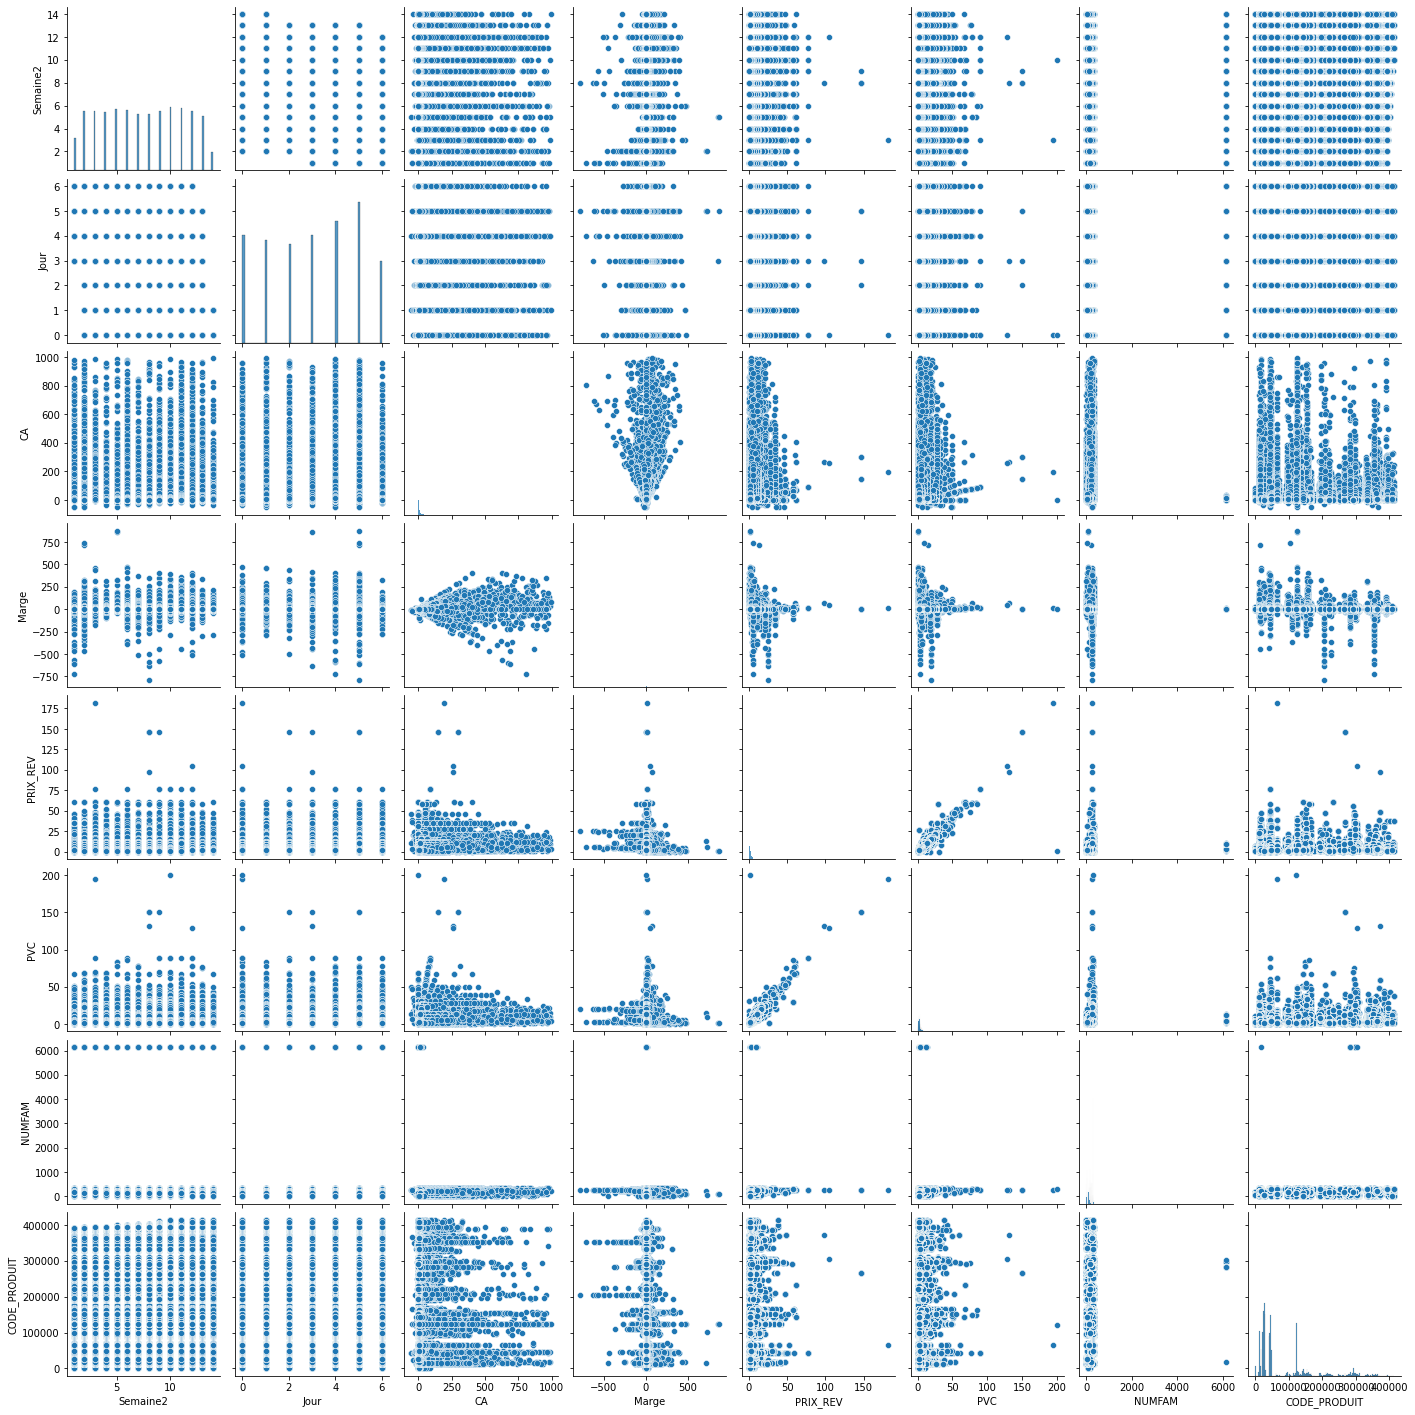

In [ ]:
sns.pairplot(df)


## Pre-Traitement


In [ ]:
missing_rate = df.isna().sum()/df.shape[0]
print(missing_rate.sort_values(ascending=False))

# df.isnull().sum().sort_values(ascending=False)


CLASSEUR             0.045430
CA                   0.000293
Marge                0.000014
Base_Magasin         0.000000
CoeffB_2             0.000000
Gencode_B_3          0.000000
Gencode_B_4          0.000000
Gencode_B_5          0.000000
Gencode_B_6          0.000000
CoeffB_1             0.000000
CoeffB_4             0.000000
CoeffB_3             0.000000
Gencode_B_1          0.000000
CoeffB_5             0.000000
CoeffB_6             0.000000
Nbr_Rupture          0.000000
Flag_Rupture         0.000000
Gencode_B_2          0.000000
VMS_BC               0.000000
CoeffA               0.000000
R1 _ code_EAN        0.000000
COD_MARKETING        0.000000
Rayon                0.000000
Secteur              0.000000
Famille              0.000000
NUMFAM               0.000000
PVC                  0.000000
PRIX_REV             0.000000
TYPE_PRIX            0.000000
Quantites_Vendues    0.000000
Date_Key             0.000000
Jour                 0.000000
Semaine2             0.000000
R2 _ libel

In [ ]:
df.dropna(inplace=True)
# df.shape
df.isnull().sum().sort_values(ascending=False)


Base_Magasin         0
CoeffB_2             0
Gencode_B_2          0
Gencode_B_3          0
Gencode_B_4          0
Gencode_B_5          0
Gencode_B_6          0
CoeffB_1             0
CoeffB_3             0
CoeffA               0
CoeffB_4             0
CoeffB_5             0
CoeffB_6             0
Nbr_Rupture          0
Flag_Rupture         0
CLASSEUR             0
Gencode_B_1          0
VMS_BC               0
R1 _ code_EAN        0
Marge                0
R2 _ libelle         0
Semaine2             0
Jour                 0
Date_Key             0
CA                   0
Quantites_Vendues    0
TYPE_PRIX            0
COD_MARKETING        0
PRIX_REV             0
PVC                  0
NUMFAM               0
Famille              0
Secteur              0
Rayon                0
CODE_PRODUIT         0
dtype: int64

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 543706 entries, 0 to 569719
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Base_Magasin       543706 non-null  object        
 1   R1 _ code_EAN      543706 non-null  object        
 2   R2 _ libelle       543706 non-null  object        
 3   Semaine2           543706 non-null  int64         
 4   Jour               543706 non-null  int64         
 5   Date_Key           543706 non-null  datetime64[ns]
 6   CA                 543706 non-null  float64       
 7   Quantites_Vendues  543706 non-null  object        
 8   Marge              543706 non-null  float64       
 9   TYPE_PRIX          543706 non-null  object        
 10  PRIX_REV           543706 non-null  float64       
 11  PVC                543706 non-null  float64       
 12  NUMFAM             543706 non-null  int64         
 13  Famille            543706 non-null  object  

c:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


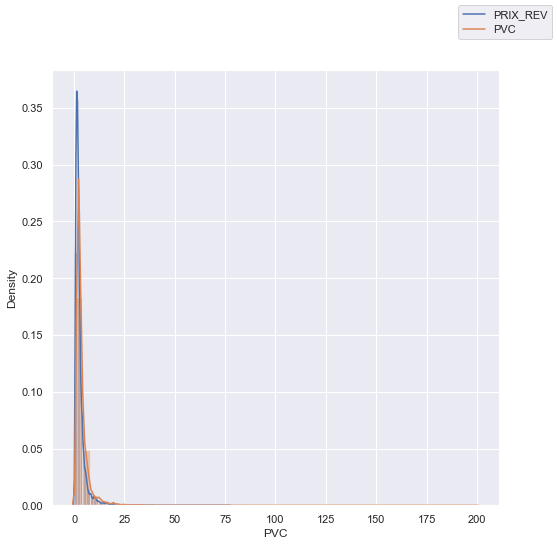

In [ ]:
myfig = plt.figure(figsize=(8, 8))
sns.set_theme()
np.random.seed(0)
sns.distplot(df['PRIX_REV'])
sns.distplot(df['PVC'])
myfig.legend(labels=['PRIX_REV', 'PVC'])


c:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


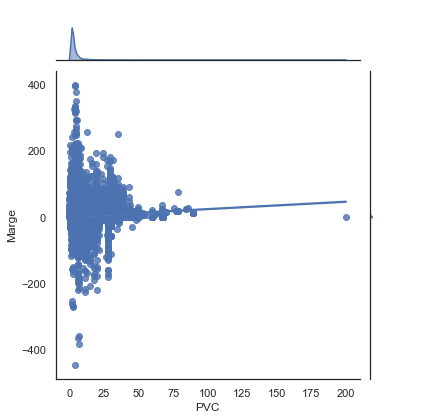

In [ ]:
with sns.axes_style('white'):
    sns.jointplot("PVC", "Marge", data=df, kind='reg')


In [ ]:
from sklearn.preprocessing import LabelEncoder
scale = LabelEncoder()


In [ ]:
cat_features = df.select_dtypes(include=object).columns
for i in cat_features:
    df[i] = scale.fit_transform(df[i])


c:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


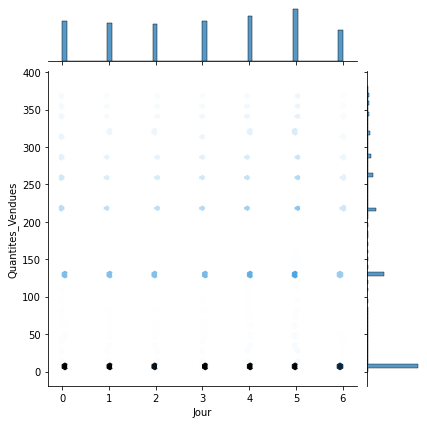

In [ ]:
sns.jointplot('Jour', 'Quantites_Vendues', data=df, kind='hex')


## Traitement N°2 | Pre-traitement 


### La Fonction de preparation des donnée 2020 et 2021 (en quadrimèstres) sous une forme propice pour notre algo de ML


In [ ]:
# 2020

def Quadrimestre2020(dataf, indice):
    dataf = dataf[['CODE_PRODUIT', 'R2 _ libelle',
                   'PVC', 'Quantites_Vendues', 'Marge']]
    dataf = dataf.drop_duplicates()
    dataf = dataf.rename(columns={'R2 _ libelle': 'LIBELLE_PRODUIT',
                         'PVC': 'Prix_de_vente', 'Quantites_Vendues': 'Quantite'})
    return dataf.to_csv('data2020_Q'+indice+'.csv', index=False)

for i in range(1, 5, 1):
    data = pd.read_csv('Données\ELDPH_CAY_T'+str(i)+'2020.csv',
                       engine='python', sep=';', encoding='latin-1')
    data_copy = data.copy()
    Quadrimestre2020(data_copy, str(i))

In [ ]:
#2021

def Quadrimestre2021(dataf, indice):
    dataf = dataf[['CODE_PRODUIT', 'R2 _ libelle',
                   'PVC', 'Quantites_Vendues', 'Marge']]
    dataf = dataf.drop_duplicates()
    dataf = dataf.rename(columns={'R2 _ libelle': 'LIBELLE_PRODUIT',
                         'PVC': 'Prix_de_vente', 'Quantites_Vendues': 'Quantite'})
    return dataf.to_csv('data2021_Q'+indice+'.csv', index=False)


for i in range(1, 5, 1):
    data = pd.read_csv('Données\ELDPH_CAY_T'+str(i)+'2021.csv',
                       engine='python', sep=';', encoding='latin-1')
    data_copy = data.copy()
    Quadrimestre2021(data_copy, str(i))

Temps d'execution pour l'importation des données : 1 min 37 s


In [ ]:
data_2020_2021 = pd.concat(map(pd.read_csv, ['data2020_Q1.csv', 'data2020_Q2.csv', 'data2020_Q3.csv', 'data2020_Q4.csv',
'data2021_Q1.csv', 'data2021_Q2.csv', 'data2021_Q3.csv', 'data2021_Q4.csv']))
data_2020_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1744559 entries, 0 to 253669
Data columns (total 5 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   CODE_PRODUIT     int64 
 1   LIBELLE_PRODUIT  object
 2   Prix_de_vente    object
 3   Quantite         object
 4   Marge            object
dtypes: int64(1), object(4)
memory usage: 79.9+ MB


In [ ]:
eliminate_char = ['Marge', 'Prix_de_vente']
for i in eliminate_char:
    data_2020_2021[i] = data_2020_2021[i].astype('str')
    data_2020_2021[i] = data_2020_2021[i].str.replace(',', '.')
    data_2020_2021[i] = pd.to_numeric(data_2020_2021[i], errors='coerce')
data_2020_2021['Quantite'] = pd.to_numeric(data_2020_2021['Quantite'], errors='coerce')
data_2020_2021["LIBELLE_PRODUIT"] = data_2020_2021["LIBELLE_PRODUIT"].values.astype(
    'str')
data_2020_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1744559 entries, 0 to 253669
Data columns (total 5 columns):
 #   Column           Dtype  
---  ------           -----  
 0   CODE_PRODUIT     int64  
 1   LIBELLE_PRODUIT  object 
 2   Prix_de_vente    float64
 3   Quantite         float64
 4   Marge            float64
dtypes: float64(3), int64(1), object(1)
memory usage: 79.9+ MB


In [ ]:
missing_rate = data_2020_2021.isna().sum()/data_2020_2021.shape[0]
print(missing_rate.sort_values(ascending=False))


Prix_de_vente      0.004484
Quantite           0.001406
Marge              0.000008
CODE_PRODUIT       0.000000
LIBELLE_PRODUIT    0.000000
dtype: float64


In [ ]:
data_2020_2021.dropna(inplace=True)
data_2020_2021.isnull().sum()


CODE_PRODUIT       0
LIBELLE_PRODUIT    0
Prix_de_vente      0
Quantite           0
Marge              0
dtype: int64

In [ ]:
data_2020_2021.to_csv('data_CAY.csv',index=False)

In [ ]:
Code_Libelle = data_2020_2021[['CODE_PRODUIT','LIBELLE_PRODUIT']]
Code_Libelle =  Code_Libelle.drop_duplicates()
Code_Libelle.to_csv('Code_Libelle.csv',index=False)

In [ ]:
product1 = data_2020_2021[data_2020_2021['CODE_PRODUIT'] == 22752]
product2 = data_2020_2021[data_2020_2021['CODE_PRODUIT'] == 123249]
product3 = data_2020_2021[data_2020_2021['CODE_PRODUIT'] == 432943]
product4 = data_2020_2021[data_2020_2021['CODE_PRODUIT'] == 22752]


In [ ]:
for df in product1, product2, product3, product4:
    fig_PriceVsQuantity = px.scatter(df, x="Prix_de_vente", y="Quantite", color="Marge",
                                     trendline="ols", title="Reference du produit : "+str(df['CODE_PRODUIT'].values[0])+"")
    fig_PriceVsQuantity.show()


OLS (Ordinary Least Square)


In [ ]:
model = ols("Quantite ~ Prix_de_vente", data=product2).fit()

Gamme d'optimisation : Dans la plupart des cas, nous avons une idée approximative des prix minimum et maximum sur la base de l'expérience passée. Comme nous sommes en train d'identifier le meilleur prix, il s'agira d'un bon point de départ, que nous affinerons ensuite par de multiples itérations.


In [ ]:
cost = 1.3
quantity = []
Revenue = []
for i in product2['Prix_de_vente']:
    demand = model.params[0] + (model.params[1] * i)
    quantity.append(demand)
    Revenue.append((i-cost) * demand)


Nous allons créer un cadre de données avec les 3 colonnes Prix, Revenu, et Quantité qui nous permettra d'accéder facilement à ces valeurs


In [ ]:
profit = pd.DataFrame(
    {"Price": product2['Prix_de_vente'], "Revenue": Revenue, "Quantity": quantity})
max_val = profit.loc[(profit['Revenue'] == profit['Revenue'].max())]


In [ ]:
max_val['Price'].max()

1.55

In [ ]:
fig_PriceVsRevenue = go.Figure()
fig_PriceVsRevenue.add_trace(go.Scatter(
    x=profit['Price'], y=profit['Revenue']))
#fig_PriceVsRevenue = px.line(product4,x=profit['Price'], y=profit['Revenue'], color="Marge",text="Marge")
fig_PriceVsRevenue.add_annotation(
    x=max_val['Price'], y=max_val['Revenue'], text="Revenue Maximum ", showarrow=True, arrowhead=1)
fig_PriceVsRevenue.update_layout(
    showlegend=False, xaxis_title="Prix de vente", yaxis_title="Revenue")
#fig_PriceVsRevenue.add_vline(x=max_val['Price'], line_width=2, line_dash="dash",line_color="red", opacity=0.25)


---

---

In [ ]:
data_2020_2021.describe(include='O')

,LIBELLE_PRODUIT
count,1734276
unique,27805
top,KETCHUP NAT.MASQ.D'OR PPX 560G
freq,620


In [ ]:
var_ref = int(input("Entrer le code produit : "))
Product = data_2020_2021[data_2020_2021['CODE_PRODUIT'] == var_ref ]

In [ ]:

fig_PriceVsQuantity = px.scatter(Product, x="Prix_de_vente", y="Quantite", color="Marge",
                                     trendline="ols", title="Reference du produit : "+str(Product['CODE_PRODUIT'].values[0])+"")
fig_PriceVsQuantity.show()

OLS (Ordinary Least Square)

In [ ]:
model = ols("Quantite ~ Prix_de_vente", data=Product).fit()

Gamme d'optimisation : Dans la plupart des cas, nous avons une idée approximative des prix minimum et maximum sur la base de l'expérience passée. Comme nous sommes en train d'identifier le meilleur prix, il s'agira d'un bon point de départ, que nous affinerons ensuite par de multiples itérations.


In [ ]:
cost = float(input("La valeur du Cost?")) 
quantity = []
Revenue = []
for i in Product['Prix_de_vente']:
    demand = model.params[0] + (model.params[1] * i)
    quantity.append(demand)
    Revenue.append((i-cost) * demand)

Nous allons créer un cadre de données avec les 3 colonnes Prix, Revenu, et Quantité qui nous permettra d'accéder facilement à ces valeurs

In [ ]:
profit = pd.DataFrame(
    {"Price": Product['Prix_de_vente'], "Revenue": Revenue, "Quantity": quantity})
max_val = profit.loc[(profit['Revenue'] == profit['Revenue'].max())]

In [ ]:
fig_PriceVsRevenue = go.Figure()
fig_PriceVsRevenue.add_trace(go.Scatter(x=profit['Price'], y=profit['Revenue']))
fig_PriceVsRevenue.add_annotation(x=max_val['Price'], y=max_val['Revenue'], text="Revenue Maximum ", showarrow=True, arrowhead=1)
fig_PriceVsRevenue.update_layout(showlegend=False, xaxis_title="Prix de vente", yaxis_title="Revenue")

## Modelisation


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [ ]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)


In [ ]:
def preprocessing(df):
    X = df.drop(['Marge', 'Date_Key'], axis=1)
    y = df['Marge']
    return X, y


In [ ]:
X_train, y_train = preprocessing(trainset)
print(X_train.shape, y_train.shape)

X_test, y_test = preprocessing(testset)
print(X_test.shape, y_test.shape)


(434964, 33) (434964,)
(108742, 33) (108742,)


In [ ]:
model1 = LinearRegression()


In [ ]:
def prediction(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred


## Procedure d'evaluation


In [ ]:
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import learning_curve
import math
import statsmodels.api as sm


In [ ]:
# RegressionL
print(mean_squared_error(y_test, prediction(model1)))


34.15129059640511
